# Attack on RSA
In the following notebook we will firstly provide you with some basics of cryptography and more specific provide information about the RSA algorithm. Then we will use everything we have learned so far to perform a simple power analysis attack on a RSA encryption algorithm to retrieve the hidden key.

**Goals:**
* Learn basics of cryptograpgy (terminology, difference between symmetric and assymmetric)
* Learn how RSA works 
* Use a simple power analysis attack (SPA) to retrieve the hidden key.

#### Prerequisites
- [x] *0_series* notebooks 
- [x] *1_A - Correlation between tasks being performed by the target and its power consumption* notebook

## Cryptography basics

Cryptography is used to protect information so that you can send this information to someone else and that no third party will be able to understand the information that is being send. **Plain text** is used to describe the unprotected information being send. **Encrypted text** is the same information but after the plain text has been **encrypted**. The encrypted text is most of the times just a series of characters or numbers. With good encryption someone who has obtained the encrypted text (and isn't supposed to have the text) will not be able to convert the encrypted text back to the plain text. The intended receiver of the information can convert the encrypted text back to plain text by **decrypting** the information. The **decrypted text** is the original plain text again which can be read by the receiver.

But how are you able to encrypt and decrypt the information? There are two types of cryptography that are widely used: **symmetric cryptography** and **asymmetric cryptography**. We will firstly go over how symmetric cryptography works since it is a bit more straightforward to understand. 

### Symmetric encryption

<img src="src/images/symmetric_crypto.png" alt="Symmetric encryption diagram" width=800>

Let's say we have a woman named Alice and she wants to send a message to Bob over the internet. (see diagram above to follow along) Alice does not want anyone else but Bob to be able to read the message so she will encrypt the message. To encrypt the message Alice uses a secret key. In order for Bob to be able to decrypt the message he needs to have **the same** secret key. This is called symmetric cryptography because you use the same key to encrypt and decrypt the message. (How Alice and Bob are able to have the same secret key will be discussed later) It is important to note that the plain text is never send over the internet where other people can get their hand on it. 

### Asymmetric encryption

<img src="src/images/asymmetric_crypto.png" alt="Asymmetric encryption diagram" width=800>

Now, let's see how Alice can send a message to Bob using asymmetric encryption. (You can follow along in the diagram above again) The use this type of encryption Bob needs to have two keys in order for Alice to send him a message. Bob has a **public key** which he broadcasts to everyone on the internet. Bob also has a **private key** that he <ins>doesn't share</ins> with anyone. Anyone who wants to send Bob a message now uses his public key to encrypt their message to Bob. As you can see Alice uses Bob's public key to encrypt her message. That encrypted message is then send to Bob over the internet. Bob receives the message and uses his own private key to decrypt the message.

Important difference with symmetric cryptography is that even Alice won't be able to decrypt the message. But this was possible with symmetric cryptography since encrytion and decrytion used the same key. So if Bob wants to send a reply he needs to use Alice's public key and she will use her private key to decrypt the message.

### Some extra info
To perform the encryption and decryption a lot of the times mathematical formulas are used. In order to easily use these formulas the plain text is presented as a number. Luckily text on a computer is nothing more than a big binary number. The keys that we have spoken of in the example are also just some binary numbers (as you will see in the rest of the tutorials).

You might still be wondering how Alice and Bob, with symmetric cryptography, can have the same key without anyone knowing. Well you know there is also a thing called asymmetric cryptography where we don't have this issue. Combined with the fact that asymmetric cryptography usually takes longer than symmetric cryptography, it is not hard to understand that in the real world Bob and Alice would firstly use asymmetric cryptography to send each other the secret key, used for symmetric cryptography. Once they securely have the same key, they can use the faster symmetric cryptography to send large messages to each other.

We have only showed you the tip of the iceberg here so if you want to learn more about cryptography a link to videolectures about the topic is provided here: [Videolectures of Christof Paar](https://www.youtube.com/channel/UC1usFRN4LCMcfIV7UjHNuQg/videos)

### Implementation of cryptography
The process of encrypting and decrypting text input can be programmed using software. You can also program a microcontroller for example on which you can set a key. When you send some input the microcontroller automatically encrypts the input using the stored key and returns the encrypted output. This is exactly how are target (the XMEGA 8-bit) works. But using a programmer we can program different kinds of encryption algorithms onto the device.

### Are cryptosystems secure?
Modern encryption algorithms are theoretically uncrackable. This means that without having the correct key you will never be able to convert the encrypted text back to plain text (with the current computing speed). However, the implementation of the algorithms in software and/or hardware can introduce weaknesses that we are going to exploit to find the key. Ans once we have the key we are able to decrypt every piece of encrypted text. What those weaknesses are, you will learn about in the following tutorials. There also exist countermeaseures that can be used in the implementation of the algorithm to prevent people from using these weaknesses to crack the algorithm. 


## RSA (Rivest - Shamir - Adleman) Cryptosystem
The first widely used encryption standard we are going to crack is RSA. It is an assymetric cryptosystem. The algorithm itself is not that simple but an attack we can use to crack it is very simple. (note that this simple attack does not work for all implementations of the RSA algorithm) As mentioned RSA is an asymmetric type of crytography which means it uses a public key and a private key. On top of those two keys we also need a public number (the modulo) that is used in conjunction with both the public and private key to encrypt and decrypt messages.

```
    P : the binary code representing the plain text (the decrypted text will be the same of course)
    C : the binary code representing the encrypted text (also called cipher text)
    d : the private key (just a binary number)
    e : the public key (just a binary number)
    N : the modulo (just a binary number)
    
```
To get the encrypted text, following mathematical formula is used:

$C = P^e mod N$

To decryptthe cypher text back into the plain text the same mathematical formula is used but instead of using the public key (e) you use the private key (d):

$P = C^d mod N$

Keep in the back of your mind that all numbers and text are just binary numbers. To perform the operation above the following code *can* be used where the function has the following parameters (cypher text = C, private key = d, modulo = N):
```
    output = 1;
    
    for (every bit in d starting from MSB) {
        
        output = output * output mod N;     //perform a square operation
        
        if (bit is 1){                      //perform an extra operation
            output = output * input mod N;  //perform a multiply operation
        }
    }
    return output;
```

The output is then the plain text P.

If you watch closely, you can see that inside the for-loop an extra instruction is performed everytime the bit of the private key is a `1`. As we have seen in earlier lessons this will show up on the power measurements trace. The start of each loop through  will have a distict form. We can then assume that the amount of time that elapses between two passes of the for-loop will be different when the bit is a `1` or a `0` since the target needs to perform an extra operation when it's a `1`. So if we analyse the power trace and measure the time between passes of the for-loop we can see if the bit of the secret key was a `1` or a `0`.
Congratulations you just found someones **private key** by just looking at the power consumption of the target. 

Using external factors like *power consumption*, *electromagnetic radiation*, *clock pulses* ... to find the hidden key is the definition of a **Side Channal Analysis Attack**. Since we used a simple analysis of the power consumption to crack the code, this attack is called a **Simple Power Analysis** attack (SPA). 

* *In the supplemental reading you will find a link to two videos that work out a simple example of the RSA algorithm and also show the relationship between the public and private key*

## Performing the attack
Firstly we need to give the correct parameters. The firmware is already compiled so we can skip that step. Then we setup the chipwhisperer board and program the target with the compiled code. (CW303 is an alias for the Chipwhisperer-lite XMEGA)

In [6]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'AVRCRYPTOLIB'

In [7]:
%run "Setup_Scripts/Setup_Generic.ipynb"

Serial baud rate = 38400
INFO: Found ChipWhisperer😍


In [12]:
cw.program_target(scope, prog, '../../chipwhisperer/hardware/victims/firmware/simpleserial-rsa/simpleserial-rsa-CW303.hex')

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 13897 bytes


### Communicating with target
The target board we are using (XMEGA) comes with some limitations regarding the RSA algorithm. We can't set the keys for the encryption that the microcontroller will perform. Instead the text we sent to the target will bes used as the plain text as well as the encryption key itself. So sending `0xB04` (hexcode B04) to the target will mean that `0xB04` is the plain text as well as the key (which will be the exponent). Furthermore the target will only 'encrypt' the message. But as we saw earlier 'encrypting' and 'decrypting' with RSA is the same exact series of operations. The only difference being the key used. We can thus look at the text we sent to the target as the cypher text and look at the key as the private key we want to find. 

Another limitation is the length of our trace array. We will only capture 24000 measurement points. If our key is too long we won't be able to measure all passes of the for-loop. To work around this we are going to use a short key. To tell the target we are only using an 16-bit long key, we will let all leading bits of the 12-bit key be `0`'s. (Since our key is our plain text and vice versa our plain text will also just be 12-bits long).

The final limitation is that the target will perform the encryption internally, but it wont send back the result. So the only way we can see if it really is performming as aspected is to send two different inputs to the target, capturing the traces and analyzing the results.

#### Forming a hypothesis
The texts we will send to device are `0xB0F` as text1 and `0xB04` as text2. 
```
    0xB 0F = 0b1011 0000 0111
    0xB 04 = 0b1011 0000 0100
```

#### Testing our hypothesis
With the following code block below we will send our plain text/key two times and plot the traces of both on top of each other using different colors:

<IPython.core.display.Javascript object>


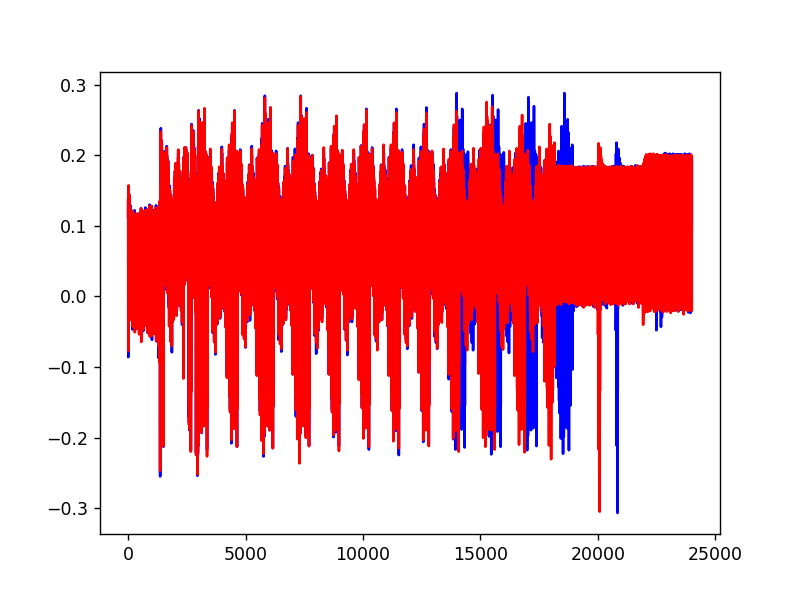

In [36]:
# some CW setup for RSA
scope.clock.adc_src = "clkgen_x1"
scope.adc.samples = 24000 # to capture enough data we will take 24000 measurements per trace

%matplotlib notebook
import matplotlib.pylab as plt

def capture_RSA_trace(scope, target, text):
    # arm the CW scope to start recording power consumption
    scope.arm()
    # send the input text to the target
    target.simpleserial_write('p', text)
    # capture a power measurement
    ret = scope.capture()
    if ret:
        return None
    target.simpleserial_wait_ack()
    # all 24000 traces are collected
    
    # return the array of power measurements
    return scope.get_last_trace()

text1 = bytearray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0x0B, 0x0F])
# 0xB0F = 0b1011 0000 1111
trace1 = capture_RSA_trace(scope, target, text1)
plt.plot(trace1, 'b')

text2 = bytearray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0x0B, 0x04])
# 0xB04 = 0b1011 0000 0100
trace2 = capture_RSA_trace(scope, target, text2)
plt.plot(trace2, 'r')

### Supplemental Reading
* Calculating of a simple example of the RSA cryptosystem and explanation of the relation between public and private key: [Part 1](https://www.youtube.com/watch?v=4zahvcJ9glg), [Part 2](https://www.youtube.com/watch?v=oOcTVTpUsPQ)